# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [ ]:
# run this cell to upload file using GUI if you are using google colab

from google.colab import files
files.upload()

In [13]:
# run this cell to to mount the google drive if you are using google colab

#Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd

In [28]:
df = pd.read_csv('/content/drive/My Drive/Lab NN/prices.csv')

In [29]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [30]:
df.shape

(851264, 7)

## Question 2

### Drop null
- Drop null values if any

In [31]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [52]:
df.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
# No Null or NaN value observed

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [33]:
df1= pd.DataFrame.copy(df) # Housekeeping for DataFrame backup

In [36]:
df1 = df1.drop(['date','volume','symbol'],axis = 1)

## Question 3

### Print the dataframe
- print the modified dataframe

In [37]:
df1.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    851264 non-null  float64
 1   close   851264 non-null  float64
 2   low     851264 non-null  float64
 3   high    851264 non-null  float64
dtypes: float64(4)
memory usage: 26.0 MB


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [39]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

X = df1.drop('close',axis=1)
y = df1.pop('close')

In [40]:
X.shape, y.shape

((851264, 3), (851264,))

In [53]:
X.head()

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002


In [54]:
y.head()

0    125.839996
1    119.980003
2    114.949997
3    116.620003
4    114.970001
Name: close, dtype: float64

## Question 4

### Create train and test sets
- Split the data into training and testing

In [57]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [42]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [66]:
type(X_train)

pandas.core.frame.DataFrame

In [45]:
X_train_np = np.array(X_train)

In [46]:
X_test_np = np.array(X_test)

In [47]:
y_train_np =np.array(y_train)

In [48]:
y_test_np =np.array(y_test)

In [50]:
X_train_np.shape,X_test_np.shape

((595884, 3), (255380, 3))

In [69]:
type(X_train_np),type(X_test_np),type(y_train_np),type(y_test_np)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [76]:
# Importing the required libraries from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.activations import relu

In [95]:
# Initialize the constructor
model=Sequential()
# Flatten Data
model.add(Flatten())
# Add an input layer 
model.add(Dense(1, activation='linear'))


# Add an output layer 
#model.add(Dense(1, activation='linear'))

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [115]:
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['mse'])
#optimizer="Adam", loss="mse", metrics=["mae"]

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [59]:
epochs = 50
batch_size = 128
validation_data = 0.3

In [116]:
history = model.fit(X_train_np, y_train_np, batch_size=batch_size, epochs=epochs, validation_split=validation_data, verbose=True)


Epoch 1/50
3259/3259 [==============================] - 4s 1ms/step - loss: 0.7958 - mse: 0.7958 - val_loss: 0.7553 - val_mse: 0.7553
Epoch 2/50
3259/3259 [==============================] - 4s 1ms/step - loss: 0.8253 - mse: 0.8253 - val_loss: 0.7523 - val_mse: 0.7523
Epoch 3/50
3259/3259 [==============================] - 4s 1ms/step - loss: 0.7827 - mse: 0.7827 - val_loss: 0.7528 - val_mse: 0.7528
Epoch 4/50
3259/3259 [==============================] - 4s 1ms/step - loss: 0.7813 - mse: 0.7813 - val_loss: 0.7537 - val_mse: 0.7537
Epoch 5/50
3259/3259 [==============================] - 4s 1ms/step - loss: 0.7818 - mse: 0.7818 - val_loss: 0.7427 - val_mse: 0.7427
Epoch 6/50
3259/3259 [==============================] - 4s 1ms/step - loss: 0.7780 - mse: 0.7780 - val_loss: 0.7578 - val_mse: 0.7578
Epoch 7/50
3259/3259 [==============================] - 4s 1ms/step - loss: 0.7537 - mse: 0.7537 - val_loss: 0.7688 - val_mse: 0.7688
Epoch 8/50
3259/3259 [==============================] - 4s 1ms

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt

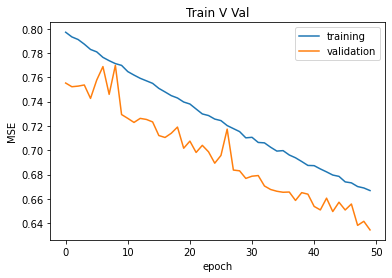

In [141]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

plt.title('Train V Val')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [144]:
 model.evaluate(X_test_np, y_test_np, verbose=False)

[0.6369514465332031, 0.6369514465332031]

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [122]:
X_new = [123.430000, 122.30999, 116.250000]

In [127]:
# Converting inputs to an array
X_new1 =np.array(X_new)

In [128]:
# Reshaping input to be fed to predict
X_new1 = X_new1.reshape(-1,3)

In [129]:
# Scaling as we'd done for entire input
X_new2 = scaler.transform(X_new1)

In [130]:
model.predict(X_new2)

array([[119.547195]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [187]:
import tensorflow as tf
#(trainX, trainY),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [188]:
y_test_k = y_test

In [189]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [190]:
y_train.shape

(60000,)

### Change train and test labels into one-hot vectors

In [191]:
# one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [192]:
num_classes

10

In [194]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Build the Graph

### Initialize model, reshape & normalize data

In [195]:
# Create the model
model = Sequential()

In [196]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))    #flattens the 28X28 image into 784 element array

In [197]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [198]:
model.add(Dense(200, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

###Also add callback, such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [199]:
model.add(Dense(num_classes, activation='softmax'))

In [200]:
# Compile model
epochs = 20
#lrate = 0.01
#decay = lrate/epochs
          
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']  )

early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]#

### Print model summary

In [201]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_24 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


###Train your model, use test data as validation set

In [202]:
history_dnn = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32 , callbacks=callback_list)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6835 - accuracy: 0.7569 - val_loss: 0.4333 - val_accuracy: 0.8445
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3969 - accuracy: 0.8549 - val_loss: 0.3854 - val_accuracy: 0.8620
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3475 - accuracy: 0.8739 - val_loss: 0.3553 - val_accuracy: 0.8703
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3245 - accuracy: 0.8814 - val_loss: 0.3754 - val_accuracy: 0.8662
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3020 - accuracy: 0.8890 - val_loss: 0.3507 - val_accuracy: 0.8719
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2875 - accuracy: 0.8936 - val_loss: 0.3434 - val_accuracy: 0.8778
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2798 - accuracy: 0.8968 - val_loss: 0.3306 - val_accuracy:

In [203]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.90%


###Predict Labels

In [204]:
y_pred = np.round(model.predict(X_test))

In [205]:
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [206]:
np.size(y_pred)

100000

In [207]:
print(y_pred[0])
np.argmax(y_pred[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


9

###Print Confusion matrix

In [208]:
from sklearn import metrics

y_predict = []
for val in y_pred:
    y_predict.append(np.argmax(val))

cm = metrics.confusion_matrix(y_test_k,y_predict) #using y_test_k as we'd reshaped y_test
print(cm)

[[863   0   9  29   4   1  87   0   7   0]
 [ 13 961   2  19   3   0   1   0   1   0]
 [ 54   1 814  10  78   0  42   0   1   0]
 [ 47   4  10 903  20   0  13   0   3   0]
 [ 42   0  87  35 806   0  27   0   3   0]
 [  1   0   0   0   0 967   0  10   0  22]
 [200   0  70  28  78   0 613   0  11   0]
 [  1   0   0   0   0  24   0 956   0  19]
 [  7   0   2   5   3   6   3   2 972   0]
 [  1   0   0   0   0   5   1  35   0 958]]


###Plot training accuracy vs validation accuracy
###Plot training loss vs validation loss

In [212]:
print(history_dnn.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


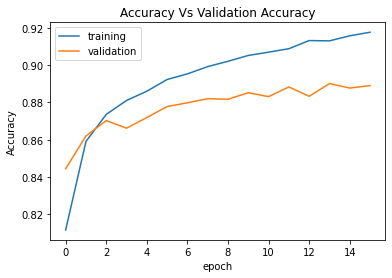

In [216]:
plt.plot(history_dnn.history['accuracy'])
plt.plot(history_dnn.history['val_accuracy'])

plt.title('Accuracy Vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

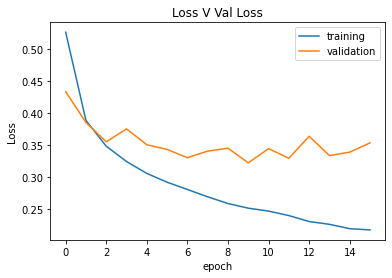

In [215]:
plt.plot(history_dnn.history['loss'])
plt.plot(history_dnn.history['val_loss'])

plt.title('Loss V Val Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()